In [2]:
import librosa

y, sr = librosa.load('../music/aozoragahigauutawari.mp3')
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo: {tempo} BPM")


Tempo: 161.4990234375 BPM


# Range:

In [3]:
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
# Extracting the main pitch from each frame
main_pitches = [pitch[magnitudes[:, idx].argmax()] for idx, pitch in enumerate(pitches.T) if magnitudes[:, idx].max() > 0]
range_value = max(main_pitches) - min(main_pitches)
print(f"Range: {range_value} Hz")


Range: 3751.82177734375 Hz


Repeated

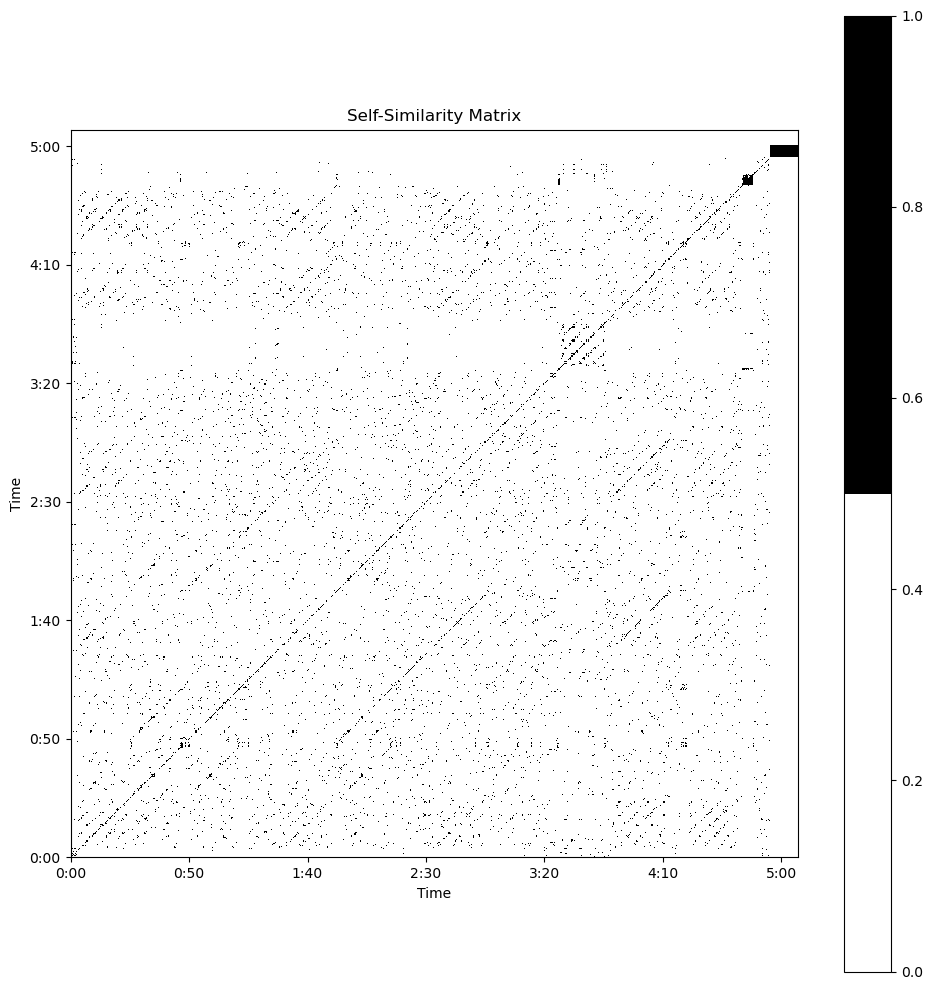

Repeated sections count: 3041520


In [6]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('../music/aozoragahigauutawari.mp3')

# Compute the chromagram
chromagram = librosa.feature.chroma_cqt(y=y, sr=sr)

# Compute the self-similarity matrix
similarity_matrix = librosa.segment.recurrence_matrix(chromagram)

# Plot the self-similarity matrix as a heatmap
plt.figure(figsize=(10, 10))
librosa.display.specshow(similarity_matrix, x_axis='time', y_axis='time')
plt.colorbar()
plt.title('Self-Similarity Matrix')
plt.tight_layout()
plt.show()

# Define a threshold and identify repeated sections
threshold = 0.9
repeated = np.sum(similarity_matrix > threshold)

print(f"Repeated sections count: {repeated}")
